# Exploration
You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

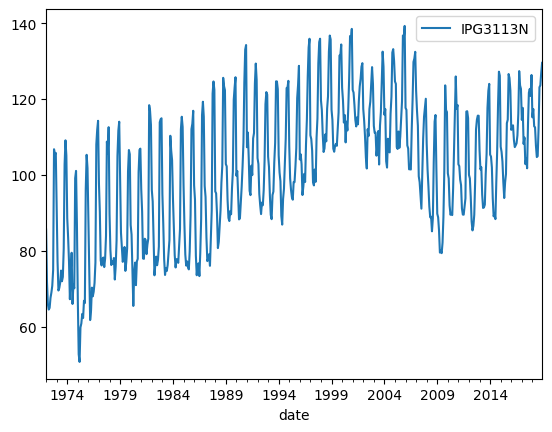

In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

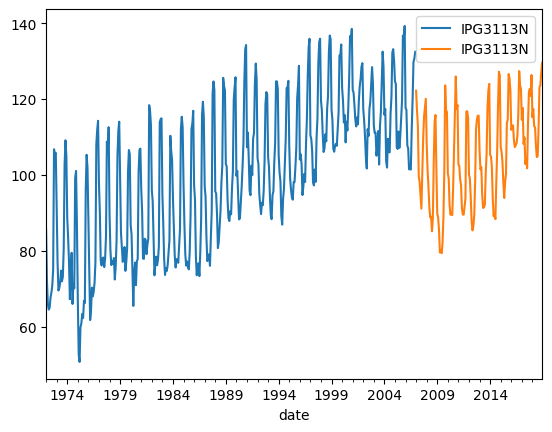

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

## Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

![stationary](stationary.png)

- Amazon stock close price: non-stationary, middle plot has a trend
- Amazon stock daily return: non-stationary, middle pot has variance changes over time
- Earthquake magnitude: stationary

## Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [3]:
# Load data (earthquake)
earthquake = pd.read_csv('earthquakes.csv',
                          index_col='date',
                          parse_dates=True)

In [4]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4])

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


## Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

Run the ADF test on the time series
- result = adfuller(city['city_population'])

Plot the time series
- fig, ax = plt.subplots()
- city.plot(ax=ax)
- plt.show()

Print the test statistic and the p-value
- print('ADF Statistic:', result[0])
- print('p-value:', result[1])

![diff](diff.png)

Calculate the first difference of the time series
- city_stationary = city.diff().dropna()

Run ADF test on the differenced time series
- result = adfuller(city_stationary['city_population'])

Plot the differenced time series
- fig, ax = plt.subplots()
- city_stationary.plot(ax=ax)
- plt.show()

Print the test statistic and the p-value
- print('ADF Statistic:', result[0])
- print('p-value:', result[1])

![diff2](diff2.png)

Calculate the second difference of the time series
- city_stationary = city.diff().diff().dropna()

Run ADF test on the differenced time series
- result = adfuller(city_stationary['city_population'])

Plot the differenced time series
- fig, ax = plt.subplots()
- city_stationary.plot(ax=ax)
- plt.show()

Print the test statistic and the p-value
- print('ADF Statistic:', result[0])
- print('p-value:', result[1])

![diff3](diff3.png)

Amazing! A p-value of 0.000000016 is very significant! This time series is now stationary and ready for modeling!

Other tranforms
Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

$\log_{\text{return}}(y_t) = \log\left(\frac{y_t}{y_{t-1}}\right)$

$y_t \rightarrow$ `amazon`

$y_{t-1} \rightarrow$ `amazon_shift(1)`

$\log_{\text{return}}(y_t) \rightarrow$ `np.log()`

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [5]:
# Load amazon data
amazon = pd.read_csv('amazon_close.csv',
                      index_col='date',
                      parse_dates=True)

In [6]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff().dropna()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811238, 2.3312717254872737e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [7]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon).diff().dropna()
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.203579488811238, 2.3312717254872737e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672195)


## Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

The list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p].
The list ma_coefs has the form [1, m_1, m_2, ..., m_q],
where a_i are the lag-i AR coefficients and m_j are the lag-j MA coefficients.

Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.7.
Generate a time series of 100 values.

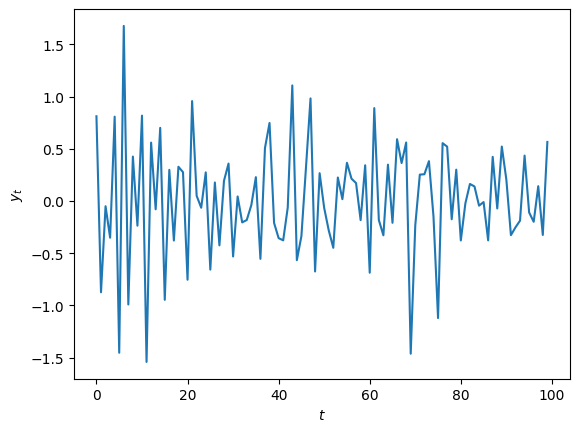

In [8]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

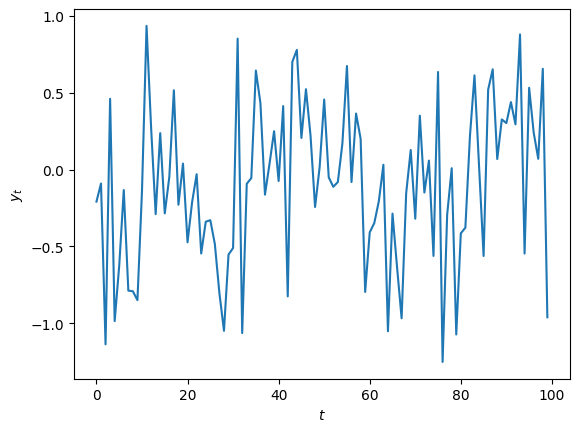

In [9]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

Set the coefficients for a model with form  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mi>t</mi>
  </msub>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mn>0.2</mn>
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <mn>0.3</mn>
  <msub>
    <mi>&#x3F5;</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <mn>0.4</mn>
  <msub>
    <mi>&#x3F5;</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x3F5;</mi>
    <mi>t</mi>
  </msub>
</math>

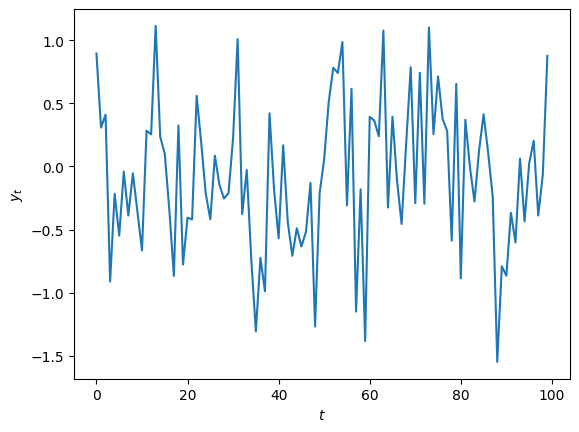

In [10]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

## Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers

In [11]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1, 0, 1))

# Fit the model
results = model.fit()

# Fitting AR and MA models
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

### Fit an AR(2) model to the 'timeseries_1' column of sample.
Print a summary of the fitted model.

Instantiate the model
- model = ARIMA(sample['timeseries_1'], order=(2, 0, 0))

Fit the model
- results = model.fit()

Print summary
- print(results.summary())


SARIMAX Results                                

    Dep. Variable:           timeseries_1   No. Observations:                 1000
    Model:                 ARIMA(2, 0, 0)   Log Likelihood                 148.855
    Date:                Mon, 19 Jun 2023   AIC                           -289.709
    Time:                        08:53:41   BIC                           -270.078
    Sample:                             0   HQIC                          -282.248
                                   - 1000                                         
    Covariance Type:                  opg                                         

                    coef    std err          z      P>|z|      [0.025      0.975]

    const         -0.0027      0.018     -0.151      0.880      -0.037       0.032
    ar.L1          0.8980      0.031     28.660      0.000       0.837       0.959
    ar.L2         -0.2704      0.032     -8.561      0.000      -0.332      -0.209
    sigma2         0.0434      0.002     21.502      0.000       0.039       0.047

    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.04
    Prob(Q):                              1.00   Prob(JB):                         0.59
    Heteroskedasticity (H):               0.95   Skew:                             0.03
    Prob(H) (two-sided):                  0.63   Kurtosis:                         2.85



Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?

- ar_coefs = [1, -0.9, 0.3]
- ma_coefs = [1]

### Fit an MA(3) model to the 'timeseries_2' column of sample.

Instantiate the model
- model = ARIMA(sample['timeseries_2'], order=(0, 0, 3))

Fit the model
- results = model.fit()

Print summary
- print(results.summary())


SARIMAX Results                                
    
    Dep. Variable:           timeseries_2   No. Observations:                 1000
    Model:                 ARIMA(0, 0, 3)   Log Likelihood                 149.007
    Date:                Mon, 19 Jun 2023   AIC                           -288.014
    Time:                        09:01:45   BIC                           -263.475
    Sample:                             0   HQIC                          -278.687
                                   - 1000                                         
    Covariance Type:                  opg                                         
    
                     coef    std err          z      P>|z|      [0.025      0.975]
    
    const         -0.0018      0.012     -0.158      0.875      -0.025       0.021
    ma.L1          0.1995      0.032      6.183      0.000       0.136       0.263
    ma.L2          0.6359      0.025     25.435      0.000       0.587       0.685
    ma.L3         -0.0833      0.031     -2.699      0.007      -0.144      -0.023
    sigma2         0.0434      0.002     21.441      0.000       0.039       0.047
    
    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.02
    Prob(Q):                              0.99   Prob(JB):                         0.60
    Heteroskedasticity (H):               0.94   Skew:                             0.00
    Prob(H) (two-sided):                  0.56   Kurtosis:                         2.84


Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?
(Remember that the generate_arma_data() function takes the MA coefficients as normal. You don't take the negative.)
- ar_coefs = [1]
- ma_coefs = [1, 0.2, 0.6, -0.1]

## Fitting an ARMA model
In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

![earthquakes.png](earthquakes.png)

The earthquakes dataset is available in your environment as earthquake. The ARIMA class is also available in your environment.


### Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.

Instantiate the model
- model = ARIMA(earthquake['earthquakes_per_year'], order=(3, 0, 1))

Fit the model
- results = model.fit()

Print model fit summary
- print(results.summary())


SARIMAX Results                                 
    
    Dep. Variable:     earthquakes_per_year   No. Observations:                   99
    Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
    Date:                  Mon, 19 Jun 2023   AIC                            643.345
    Time:                          09:08:37   BIC                            658.916
    Sample:                      01-01-1900   HQIC                           649.645
                               - 01-01-1998                                         
    Covariance Type:                    opg                                         
    
                     coef    std err          z      P>|z|      [0.025      0.975]
    
    const         19.6453      2.233      8.798      0.000      15.269      24.022
    ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
    ar.L2          0.0251      0.308      0.081      0.935      -0.578       0.629
    ar.L3          0.1519      0.186      0.818      0.413      -0.212       0.516
    ma.L1         -0.1721      0.665     -0.259      0.796      -1.475       1.131
    sigma2        34.2630      4.939      6.938      0.000      24.583      43.943
    
    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.36
    Prob(Q):                              0.97   Prob(JB):                         0.07
    Heteroskedasticity (H):               0.72   Skew:                             0.52
    Prob(H) (two-sided):                  0.36   Kurtosis:                         3.44

## Fitting an ARMAX model
In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

![exog_time_series](exog_time_series.png)

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as hospital and has the two columns mentioned above. The ARMA class is also available for you.

### Instantiate an ARMAX(2,1) model to train on the 'wait_times_hrs' column of hospital using the 'nurse_count' column as an exogenous variable.

Instantiate the model
- model = ARIMA(hospital['wait_times_hrs'], exog=hospital['nurse_count'], order=(2, 0, 1))

Fit the model
- results = model.fit()

Print model fit summary
- print(results.summary())


SARIMAX Results                                
    
    Dep. Variable:         wait_times_hrs   No. Observations:                  168
    Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
    Date:                Mon, 19 Jun 2023   AIC                             35.668
    Time:                        09:12:11   BIC                             54.411
    Sample:                    03-04-2019   HQIC                            43.275
                             - 03-10-2019                                         
    Covariance Type:                  opg                                         
    
                      coef    std err          z      P>|z|      [0.025      0.975]
    
    const           2.1001      0.086     24.375      0.000       1.931       2.269
    nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
    ar.L1           0.5693      0.169      3.365      0.001       0.238       0.901
    ar.L2          -0.1612      0.140     -1.149      0.250      -0.436       0.114
    ma.L1           0.3728      0.169      2.211      0.027       0.042       0.703
    sigma2          0.0670      0.009      7.601      0.000       0.050       0.084
    
    Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.11
    Prob(Q):                              0.90   Prob(JB):                         0.21
    Heteroskedasticity (H):               0.94   Skew:                             0.18
    Prob(H) (two-sided):                  0.81   Kurtosis:                         2.44

In [12]:
# Load amazon data as 'results'
results = pd.read_csv('amazon_close.csv',
                       index_col='date',
                       parse_dates=True)


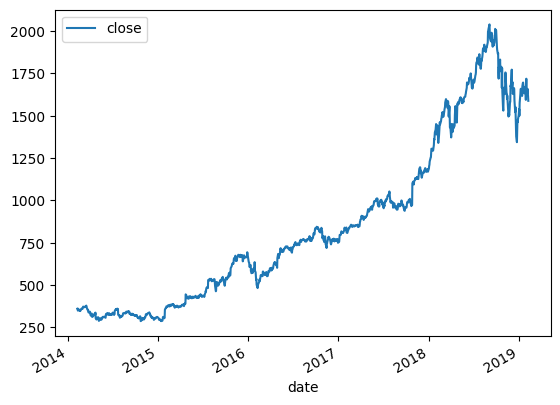

In [13]:
# Plot the results
results.plot()
plt.show()

In [14]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1, 0, 1))

# Fit the model
results = model.fit()

# Plot the results
results.plot()
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot'